# Exploratory Data Analysis - DSCI 522 Group 29

## Authors

* Rachel Wong
* Javairia Raza
* Sukhdeep Kaur
* Zhiyong Wang

GitHub link to group repository: https://github.com/UBC-MDS/group29

GitHub link to EDA: https://github.com/UBC-MDS/group29/blob/main/reports/EDA/EDA_initial.ipynb

## Introduction

Initial exploratory data analysis of diabetic encounters dataset. Using this diabetic encounters dataset, our aim is to answer the question: XXX

This dataset was taken from https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008# of encounters with diabetic patients from 1999-2008 in 130 hospitals across the United States of America. Research from this collected data was used to assess diabetic care during hospitalization and determine if patients were likely to be readmitted or not.

The paper detailing the data collection and research can be found here: https://www.hindawi.com/journals/bmri/2014/781670/

Feature descriptions about the data can be found here: https://www.hindawi.com/journals/bmri/2014/781670/tab1/

## EDA:

### Import Packages

In [2]:
import numpy as np
import pandas as pd
import altair as alt
from pandas_profiling import ProfileReport

In [11]:
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [7]:
# Packages necessary for importing data (from a zip file containing 2 dataset CSVs)
import requests, zipfile
from urllib.request import urlopen
from io import BytesIO

In [8]:
# Packages necessary for data splitting
from sklearn.model_selection import train_test_split

### Import the Dataset

In [8]:
zip_file_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip"
zip_file_load = urlopen(zip_file_url)
zipinmemory = BytesIO(zip_file_load.read())
zip_file = zipfile.ZipFile(zipinmemory)

# Only load the first file in the zip folder
diabetes_csv = pd.read_csv(zip_file.open(zip_file.namelist()[0]))

### Explore Dataset Features

In [6]:
diabetes_csv.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
diabetes_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
diabetes_csv.describe(include = 'all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Initial data exploration shows that we have different types of features (categorical, numerical, and binary), and some of these features also have missing values. The dataset is large and representative, and we can label our target column as `readmitted`. 

### Pandas Profiling
Use Pandas Profiling to create a report about the dataset, including information about each feature, and possible correlations between features. The report is outputted as an interactable html file named `pandas_profiling.html`.

In [7]:
profile = ProfileReport(diabetes_csv, title='Diabetic Patient Readmission')
#profile.to_notebook_iframe() # create pandas profiling report in notebook
profile.to_file("pandas_profiling.html") # create pandas profiling report in an html file

After reviewing the pandas profiling output, we can see that some of our features are not informative to answering our question or contain many missing values. This includes:

* encounter_id
* patient_nbr
* weight (97% missing)
* payer_code (52% missing)
* medical_specialty (53% missing)
* examide (100% of responses were "NO")
* citoglipton (100% of responses were "NO")
* race (distribution of yes/no between different races is very similar)

We can also see that there is some correlation between specific features, particularily, num_medications and time_in_hospital. 

Pandas Profiling has also determined potential class imbalance based on the target `readmitted` column having 54864 values of NO, 35545 values of >30, and 11357 values of <30. Class imbalance here can be avoided by changing the `readmitted` column to binary "YES" or "NO" values if the patient was readmitted or not. This would then give us 54864 "NO" values and 46902 "YES" values, and thus avoiding class imbalance.

### Data Wrangling

In [9]:
# Change `readmitted` target column to binary "YES" or "NO" values if admitted or not.
pattern = r'[<>]30'
diabetes_csv["readmitted"] = diabetes_csv["readmitted"].str.replace(pattern,"YES",regex = True)

# Convert any ? to na
diabetes_csv = diabetes_csv.replace("?", np.NaN)

# Drop any rows with na
diabetes_clean = diabetes_csv.dropna()

# Drop columns not useful to answering our question
diabetes_clean = diabetes_csv.drop(columns = ["encounter_id", "patient_nbr", "race", "weight", "payer_code", "medical_specialty", "examide", "citoglipton"])

diabetes_clean.head(10)

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Female,[0-10),6,25,1,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,Female,[10-20),1,1,7,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,YES
2,Female,[20-30),1,1,7,2,11,5,13,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,Male,[30-40),1,1,7,2,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Male,[40-50),1,1,7,1,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Male,[50-60),2,1,2,3,31,6,16,0,...,No,Steady,No,No,No,No,No,No,Yes,YES
6,Male,[60-70),3,1,2,4,70,1,21,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Male,[70-80),1,1,7,5,73,0,12,0,...,No,No,No,No,No,No,No,No,Yes,YES
8,Female,[80-90),2,1,4,13,68,2,28,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Female,[90-100),3,3,4,12,33,3,18,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Repeated histograms comparing one numerical variable in the x compare to another variable @ Sukhdeep

### Overlapping feature histograms to compare against the target to check what features are more important

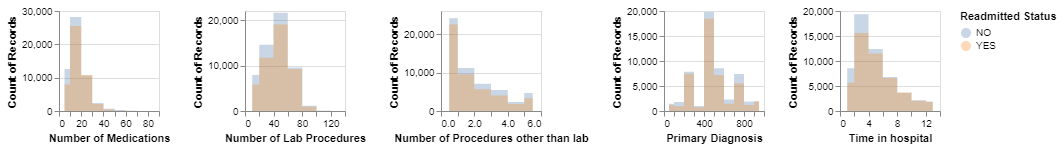

In [63]:
#for numerical variables

num_var_dict = {"num_medications": "Number of Medications",
            "num_lab_procedures": "Number of Lab Procedures",
            "num_procedures": "Number of Procedures other than lab", 
            "diag_1" : "Primary Diagnosis",
            "time_in_hospital" : "Time in hospital"
           }

chart1 = []
for key, value in num_var_dict.items():
    chart1.append(alt.Chart(diabetes_clean).mark_area(
        opacity=0.3,
        interpolate='step'
    ).encode(
        alt.X(key, type = "quantitative", bin=alt.Bin(maxbins=10), title = value),
        alt.Y('count()', stack=None),
        alt.Color('readmitted:N', title = "Readmitted Status")
    ).properties(width = 100, height = 100))
horizontal = alt.hconcat(*chart1)





horizontal

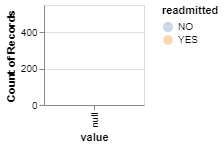

In [67]:

alt.Chart(df).mark_area(
        opacity=0.3,
        interpolate='step'
    ).encode(
        alt.X("age:T bin=alt.Bin(maxbins=10), title = "value"),
        alt.Y('count()', stack=None),
        alt.Color('readmitted:N')
    ).properties(width = 100, height = 100)



In [12]:
df = diabetes_clean[:1000]

### Look at the correlation of the variables against targets in point correlation matrix @Sukhdeep

### Scatterplot @ Sukhdeep

### Distribution of race in the dataset and the difference in the readmission status between races 

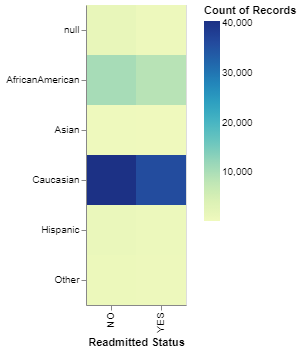

In [47]:
race_plot_b = alt.Chart(diabetes_csv).mark_rect().encode(
    y = alt.Y("race:N", title = None),
    x = alt.X("readmitted", title = "Readmitted Status"),
    color = "count()",
).properties(width = 100, height = 300)

race_plot_b

### remember to save png files 

### Split Data into Training and Testing Before Further Exploration

In [27]:
# Split the data into training (0.8) and testing (0.2)
train_df, test_df = train_test_split(diabetes_clean, test_size=0.2, random_state=123)

# Split the data into X and Y
X_train, y_train = train_df.drop(columns=["readmitted"]), train_df["readmitted"] 
X_test, y_test = test_df.drop(columns=["readmitted"]), test_df["readmitted"]